# import

In [427]:
seed = 42

# Import libraries
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import train_test_split

import random
random.seed(seed)
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import cv2
#from google.colab.patches import cv2_imshow
import numpy as np
import os
import glob
from PIL import Image

from skimage.transform import resize

from tensorflow.keras.initializers import he_normal, glorot_uniform, glorot_normal
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import TensorBoard

import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.utils import to_categorical

import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"

devices = tf.config.experimental.list_physical_devices()
print("Dispositivi visibili a TensorFlow:")
for device in devices:
    print(device)
from tensorflow.keras.layers import GlobalAveragePooling2D,BatchNormalization
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense, Reshape, Flatten, Dropout, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.initializers import HeNormal, GlorotUniform, Zeros
from tensorflow.keras.losses import MeanSquaredError
import numpy as np

from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.losses import BinaryCrossentropy


import h5py
import os
import numpy as np
import numpy as np
from tensorflow.keras.models import load_model

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
import numpy as np
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import Lasso
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from scipy.stats import ttest_ind

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc

import h5py
import os
import numpy as np
import numpy as np
from tensorflow.keras.models import load_model

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
import numpy as np
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier


from sklearn.linear_model import Lasso
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
#import pymrmr
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc

import os

Dispositivi visibili a TensorFlow:
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


# encoders

## encoder solito

In [348]:
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam

def encoder(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = GlobalAveragePooling2D()(x)  # Global Average Pooling
    x = Flatten()(x)
    encoded = Dense(128, activation='relu', kernel_regularizer=l1(10e-8))(x)
    encoder_model = Model(inputs, encoded, name='encoder')
    return encoder_model

# Ricrea l'architettura del modello encoder
input_shape = (64, 64, 1)
encoder = encoder(input_shape)

# Carica i pesi salvati
#encoder.load_weights('/Users/alessiamenozzi/Desktop/ThesisPlaques/encoderweightsp_value/encoder128.weights.h5')
encoder=load_model('/Users/alessiamenozzi/Desktop/ThesisPlaques/encoder_models/encoder_model32.h5')

KeyboardInterrupt: 

## encoder resnet

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Conv2DTranspose, Dense, Reshape, Input, UpSampling2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import AdamW
import tensorflow as tf

#### CREA 32 FEATURES
# 1. Encoder (ResNet50 pre-addestrata su ImageNet, modificata per 64x64x1 input)
def build_encoder():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
    encoder = Model(inputs=base_model.input, outputs=base_model.layers[-1].output, name='encoder')
    return encoder

# 2. Decoder (personalizzato per 64x64x1)
def build_decoder():
    decoder_input = Input(shape=(2, 2, 2048))  # Output del ResNet bottleneck
    x = Conv2DTranspose(512, kernel_size=3, strides=2, padding='same', activation='relu')(decoder_input)
    x = Conv2DTranspose(256, kernel_size=3, strides=2, padding='same', activation='relu')(x)
    x = Conv2DTranspose(128, kernel_size=3, strides=2, padding='same', activation='relu')(x)
    x = Conv2DTranspose(64, kernel_size=3, strides=2, padding='same', activation='relu')(x)
    x = Conv2DTranspose(3, kernel_size=3, strides=2, padding='same', activation='sigmoid')(x)  # Immagine finale 64x64x1
    decoder = Model(inputs=decoder_input, outputs=x)
    return decoder

# 3. Autoencoder
def build_autoencoder():
    encoder = build_encoder()
    
    # *Aggiungi qui il congelamento dei layer dell'encoder*
    #for layer in encoder.layers:
        #layer.trainable = False  # Congela tutti i layer dell'encoder

    # Se vuoi fare fine-tuning di alcuni strati dell'encoder (ad esempio gli ultimi):
    for layer in encoder.layers[:140]:  # Congela i primi 140 strati
         layer.trainable = False
    for layer in encoder.layers[140:]:  # Mantieni allenabili gli ultimi strati
         layer.trainable = True
    
    decoder = build_decoder()

    input_img = Input(shape=(64, 64, 1))
    encoded = encoder(input_img)
    decoded = decoder(encoded)

    autoencoder = Model(inputs=input_img, outputs=decoded)
    return autoencoder

autoencoder_model = build_autoencoder()

autoencoder_model.get_layer('encoder').load_weights('/Users/alessiamenozzi/Desktop/encoder_Resnet50.weights.h5')

## encoder trasformer

In [428]:
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, MaxPooling2D, GlobalAveragePooling2D, LayerNormalization, MultiHeadAttention, Add, Dropout, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1

def transformer_block(x, num_heads, ff_dim, rate=0.5):
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=x.shape[-1])(x, x)
    attn_output = Dropout(rate)(attn_output)
    out1 = Add()([x, attn_output])  # Residual connection
    out1 = LayerNormalization(epsilon=1e-6)(out1)

    ff_output = Dense(ff_dim, activation='relu')(out1)  # Feed-forward layer
    ff_output = Dense(x.shape[-1])(ff_output)  # Riduci di nuovo alla dimensione originale (64)
    ff_output = Dropout(rate)(ff_output)

    # Add & Norm Layer
    out2 = Add()([out1, ff_output])  # Residual connection con le stesse dimensioni
    return LayerNormalization(epsilon=1e-6)(out2)

def encoder(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = GlobalAveragePooling2D()(x)
    x = Flatten()(x)
    
    encoded = Dense(64, activation='relu', kernel_regularizer=l1(10e-6))(x)
    encoder_model = Model(inputs, encoded, name='encoder')
    return encoder_model


# Input shape del modello
input_shape = (64, 64, 1)

# Ricostruzione del modello encoder
encoder_model = encoder(input_shape)

# Transformer Block
encoded_input = encoder_model.output
x = Reshape((1, 64))(encoded_input)  # reshape per simulare una "sequenza"
x = transformer_block(x, num_heads=6, ff_dim=256)
x = Flatten()(x)

# Ricostruzione del modello encoder + transformer
encoder = Model(encoder_model.input, x, name='encoder_transformer')

# Carica i pesi salvati precedentemente
encoder.load_weights('/Users/alessiamenozzi/Desktop/encoder_transformer_relu.weights.h5')

# caricamento dati

In [429]:
# Percorso del file HDF5 da cui caricare i dati
load_path = "/Users/alessiamenozzi/Desktop/ThesisPlaques/pazienti_con_aree/classificator_data_bw_03.h5"
#load_path = "C:\\Users\\bsbar\\Desktop\\Tesi\\ThesisPlaques\\classificator_data.h5"

# Inizializza le liste per contenere i dati
loaded_class_images = []
loaded_class_labels = None
loaded_patients = None

# Apre il file HDF5 in modalità lettura
with h5py.File(load_path, 'r') as hf:
    # Itera su tutti i gruppi nel file HDF5
    for group_name in hf.keys():
        # Controlla se il nome del gruppo inizia con "patient_"
        if group_name.startswith("patient_"):
            group = hf[group_name]
            # Carica le immagini dal dataset 'images' all'interno del gruppo
            loaded_class_images.append(np.array(group['images']))
        elif group_name == "labels":
            # Carica le etichette dal dataset 'labels'
            loaded_class_labels = hf['labels'][:]
        elif group_name == "patients":
            # Carica i numeri dei pazienti dal dataset 'patients' e decodifica i byte in stringhe
            patients_array_bytes = hf['patients'][:]
            loaded_patients = [s.decode('utf-8') for s in patients_array_bytes]

print(f"Dati caricati da {load_path}")
print(f"Numero di pazienti: {len(loaded_class_images)}")
print(f"Esempio di immagini per paziente: {loaded_class_images[0].shape}")


# Carica il file CSV
file_path = "/Users/alessiamenozzi/Desktop/ThesisPlaques/data_rad_clin_DEF.csv"
#file_path = "C:\\Users\\bsbar\\Desktop\\Tesi\\ThesisPlaques\\data_rad_clin_DEF.csv"
data = pd.read_csv(file_path)

# Lista degli ID da escludere
ids_to_exclude = ["patient_TC_19", "patient_TC_40", "patient_TC_88", "patient_TC_150", "patient_TC_193"]

# Filtra il DataFrame per escludere le righe con gli ID specificati
filtered_data = data[~data['IDs_new'].isin(ids_to_exclude)]

# Estrae i valori dalla colonna 'label' del DataFrame filtrato
labels_column = filtered_data['label']

# Converte i valori della colonna 'label' in numeri interi
labels = labels_column.astype(int).tolist()

labels=np.array(labels)
print("Labels:", labels)
print("Number of labels:", len(labels))


# Carica il modello encoder
#encoder = load_model("/Users/alessiamenozzi/Desktop/ThesisPlaques/encoder_models/encoder_model32.h5", compile=False)
#encoder = load_model("/Users/alessiamenozzi/Desktop/encoder64_senzaDense.h5", compile=False)
#encoder = load_model("C:\\Users\\bsbar\\Desktop\\Tesi\\ThesisPlaques\\encoder_models\\encoder_model32.h5", compile=False)

# Funzione per ottenere le feature da una singola immagine
def get_features_from_image(image):
    image = image.astype('float32')
    image = image / 255.0
    # Ottieni le feature dall'encoder
    if len(image.shape) == 2:  # Se l'immagine è 64x64
        image = np.expand_dims(image, axis=-1)  # Aggiungi canale se necessario (per immagini in bianco e nero)
    image = np.expand_dims(image, axis=0)  # Aggiungi dimensione batch
    features = encoder.predict(image, verbose=False)
    features = np.squeeze(features)
    #print(features.shape)
    return np.array(features)

# Lista per salvare le feature delle immagini
patients = []

# Ottieni le feature per ogni immagine nella lista
for i in range(len(loaded_class_images)):
    features_list = []
    for img in loaded_class_images[i]:
        features = get_features_from_image(img)
        features_list.append(features)
    fetures_list = np.array(features_list)
    patients.append(features_list)

Dati caricati da /Users/alessiamenozzi/Desktop/ThesisPlaques/pazienti_con_aree/classificator_data_bw_03.h5
Numero di pazienti: 124
Esempio di immagini per paziente: (28, 64, 64)
Labels: [0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0
 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0
 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 1 1 0 1 0 1]
Number of labels: 124


# split

In [446]:
#patients_train, patients_test, y_train, y_test, features_train, features_test= train_test_split(loaded_patients, labels, patients, test_size=0.2, shuffle=True, stratify=labels, random_state=46)

patients_train1, patients_test, y_train1, y_test, features_train1, features_test= train_test_split(loaded_patients, labels, patients, test_size=0.2, shuffle=False, random_state=1)
patients_train, patients_val, y_train, y_val, features_train, features_val= train_test_split(patients_train1, y_train1, features_train1, test_size=0.3, shuffle=True, stratify=y_train1, random_state=4)
#patients_train, patients_val, y_train, y_val, features_train, features_val= train_test_split(patients_train1, y_train1, features_train1, test_size=0.8, shuffle=False, random_state=1)

print(patients_train)
print(patients_test)
print(patients_val)
print("--------------------")
print(len(features_train))
print(len(features_train[0][0]))
print(len(features_train[1]))
print(len(features_train[2]))

print(features_train[0][0].shape)

['123', '110', '43', '53', '12', '68', '138', '146', '76', '91', '26', '27', '101', '120', '102', '133', '57', '47', '70', '129', '90', '139', '50', '58', '42', '61', '118', '85', '35', '52', '107', '100', '54', '105', '104', '78', '144', '124', '117', '126', '84', '142', '24', '48', '33', '44', '60', '62', '75', '86', '81', '69', '136', '17', '87', '96', '106', '79', '15', '135', '65', '92', '23', '95', '46', '115', '59', '109', '30']
['147', '149', '153', '155', '158', '159', '161', '163', '166', '168', '169', '170', '171', '175', '176', '178', '182', '183', '188', '189', '190', '197', '199', '200', '205']
['108', '64', '56', '114', '41', '82', '5', '141', '127', '16', '137', '31', '36', '22', '112', '98', '74', '128', '89', '38', '29', '119', '94', '25', '39', '103', '71', '116', '111', '113']
--------------------
69
64
28
20
(64,)


In [452]:
print(features_train[0][4])
print(features_train[0][4])
print(features_train[0][4])
print()
print(features_train[2][4])
print("-------")
print(features_train[3][6])

[0.49872902, 0.15563382, 0.42843145, 0.21877712, 0.34726498, 0.097954035, 0.28128108, 0.1273808, 0.1271264, 0.22804157, 0.111942105, 0.118140355, 0.21221144, 0.09826027, 0.10965412, 0.25729936, 0.12483762, 0.49517208, 0.14250354, 0.35546228, 0.16401681, 0.12446245, 0.23567864, 0.13436446, 0.5188662, 0.16117501, 0.15514068, 0.19522706, 0.11475791, 0.22939268, 0.22320431, 0.13045236, 0.20334391, 0.23387533, 0.6015382, 0.18306005, 0.5205376, 0.096059695, 0.47447723, 0.12069974, 0.10066103, 0.10269753, 0.6543187, 0.3960894, 0.6779967, 0.116135955, 0.11178526, 0.10606531, 0.31425914, 0.6644622, 0.105625056, 0.13993146, 0.48666343, 0.13970937, 0.48884976, 0.10695371, 0.5003651, 0.5583902, 0.15956198, 0.22643471, 0.11121029, 0.18554632, 0.13966505, 0.47104073]
[0.49872902, 0.15563382, 0.42843145, 0.21877712, 0.34726498, 0.097954035, 0.28128108, 0.1273808, 0.1271264, 0.22804157, 0.111942105, 0.118140355, 0.21221144, 0.09826027, 0.10965412, 0.25729936, 0.12483762, 0.49517208, 0.14250354, 0.3554

## normalizzazione

In [451]:
# 1. Estrarre tutte le features in un unico array
all_features = np.array([feature for paz in features_train for img in paz for feature in img])

# 2. Calcolare il minimo e il massimo globali
min_val = np.min(all_features)
max_val = np.max(all_features)

# 3. Normalizzare tutte le features
features_train = [
    [[(feature - min_val) / (max_val - min_val) for feature in img] for img in paz]
    for paz in features_train
]
# 3. Normalizzare tutte le features
features_val = [
    [[(feature - min_val) / (max_val - min_val) for feature in img] for img in paz]
    for paz in features_val
]

features_test = [
    [[(feature - min_val) / (max_val - min_val) for feature in img] for img in paz]
    for paz in features_test
]


# funzioni

## funzioni 1

In [ ]:
## FILE DI FUNZIONI

def continue_array(filtered_patients, labels):
    all_features = []
    for patient in filtered_patients:
        for image_features in patient:
            all_features.append(image_features)

    all_features_array = np.array(all_features)

    # Print the shape of the combined features array
    #print(f"Shape of combined features array: {all_features_array.shape}")

    # Initialize the new expanded labels and patient IDs vectors
    expanded_labels = []
    expanded_patient_ids = []

    # Assuming labels and loaded_patients are already defined
    # labels: A list of length 124 with labels for each patient
    # loaded_patients: A list of length 124 with IDs for each patient

    # Iterate over the filtered patients and expand the labels and patient IDs
    for i in range(len(filtered_patients)):
        num_images = len(filtered_patients[i])  # Number of images for the current patient
        expanded_labels.extend([labels[i]] * num_images)  # Assign the same label to all images of the patient
        expanded_patient_ids.extend([loaded_patients[i]] * num_images)  # Assign the same patient ID to all images of the patient

    # Convert the lists to NumPy arrays
    expanded_labels_array = np.array(expanded_labels)
    expanded_patient_ids_array = np.array(expanded_patient_ids)

    # Print the shapes of the new arrays to verify
    #print(f"Shape of expanded labels array: {expanded_labels_array.shape}")
    #print(f"Shape of expanded patient IDs array: {expanded_patient_ids_array.shape}")
    return all_features_array, expanded_labels_array, expanded_patient_ids_array


def filter_highly_correlated_features(df, corr, threshold=0.85):
    columns = np.full((corr.shape[0],), True, dtype=bool)
    removed_features = []

    for i in range(corr.shape[0]):
        for j in range(i + 1, corr.shape[0]):
            if corr.iloc[i, j] >= threshold:
                if columns[j]:
                    columns[j] = False
                    removed_features.append(df.columns[j])

    #selected_columns = df.columns[columns]
    return removed_features



def remove_features_from_patients(patients, features_to_remove):
    # Estrai gli indici delle caratteristiche da rimuovere
    feature_indices_to_remove = [int(feature.split('_')[1]) for feature in features_to_remove]
    
    # Rimuovi le caratteristiche corrispondenti dagli array dei pazienti
    final_patients = []
    for patient in patients:
        new_patients = []
        for image_features in patient:
            new_patient = np.delete(image_features, feature_indices_to_remove, axis=0)
            new_patients.append(new_patient)
        final_patients.append(np.array(new_patients))    

    return final_patients


def keep_features_in_patients(patients, features_to_keep):
    # Converti le stringhe degli indici in interi
    feature_indices_to_keep = [int(feature) for feature in features_to_keep]

    final_patients = []
    for patient in patients:
        new_patients = []
        for image_features in patient:
            # Seleziona solo le caratteristiche specificate negli array dei pazienti
            new_patient = np.take(image_features, feature_indices_to_keep, axis=0)
            new_patients.append(new_patient)
        final_patients.append(np.array(new_patients))

    return final_patients



def perform_correlation(z_train, y_train, numero = 32, threshold = 0.85):
    # Supponiamo che loaded_patients contenga le etichette dei pazienti

    all_images, _, _= continue_array(z_train, y_train)

    # Creazione del DataFrame con le immagini come righe e le features come colonne
    df = pd.DataFrame(all_images, columns=[f'feature_{i}' for i in range(numero)])

    # Visualizzazione del DataFrame
    corr_matrix = df.corr()

    # Se vuoi anche visualizzare la matrice di correlazione con Seaborn
    #plt.figure(figsize=(12, 10))
    #sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    #plt.title("Feature Correlation Matrix")
    #plt.show()  
    
    features_selected = filter_highly_correlated_features(df, corr_matrix, threshold)
    
    return features_selected



## FEATURE SELECTION LASSO
def select_features_with_lasso(X, y, alpha=0.001):
    
    # Fit Lasso regression model
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)

    # Get coefficients
    coefficients = lasso.coef_

    # Select features with non-zero coefficients
    selected_features = np.where(coefficients != 0)[0]

    # Create new feature matrix with only selected features
    X_selected = X[:, selected_features]

    return X_selected, selected_features

## FEATURE SELECTION LOGISTIC
def logistic_regression_feature_selection(X, y, num_features):
    lr = LogisticRegression(max_iter=1000, random_state=42)
    lr.fit(X, y)
    coef_abs = np.abs(lr.coef_)
    feature_importances = np.mean(coef_abs, axis=0)
    selected_features = feature_importances.argsort()[-num_features:][::-1]
    # Create new feature matrix with only selected features
    X_selected = X[:, selected_features]
    return X_selected, selected_features


def mrmr_feature_selection(X, y, num_features):
    # Calcolare l'informazione mutua tra ogni caratteristica e il target
    mi = mutual_info_classif(X, y)
    
    # Standardizzare le caratteristiche
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Calcolare la distanza euclidea tra le caratteristiche
    distances = squareform(pdist(X_scaled.T, 'euclidean'))
    
    selected_features = []
    selected_indices = []
    
    # Selezionare la prima caratteristica con la massima informazione mutua
    first_feature_index = np.argmax(mi)
    selected_features.append(first_feature_index)
    selected_indices.append(first_feature_index)
    
    # Iterare per selezionare le caratteristiche rimanenti
    for _ in range(num_features - 1):
        max_relevance = -np.inf
        selected_feature_index = -1
        
        for i in range(X.shape[1]):
            if i in selected_indices:
                continue
            
            relevance = mi[i]
            redundancy = np.mean(distances[i, selected_indices])
            
            mrmr_score = relevance - redundancy
            
            if mrmr_score > max_relevance:
                max_relevance = mrmr_score
                selected_feature_index = i
        
        selected_features.append(selected_feature_index)
        selected_indices.append(selected_feature_index)

    X_selected = X[:, selected_indices]
    return X_selected, selected_indices

## FEATURE SELECTION MRMR
def mrmr_feature_selection1(X, y, num_features):
     
    feature_names = [f'feature_{i}' for i in range(X.shape[1])]
    data = pd.DataFrame(X, columns=feature_names)
    data['target'] = y
    data.columns = data.columns.astype(str)
    selected_features = pymrmr.mRMR(data, 'MIQ', num_features)
    selected_indices = [data.columns.get_loc(feature) for feature in selected_features]
    # Crea una nuova matrice delle caratteristiche con solo le caratteristiche selezionate
    X_selected = X[:, selected_indices]

    return X_selected, selected_indices


## FEATURE SELECTION RANDOM FOREST
def rf_feature_selection(X, y, num_features):
    # Inizializza il classificatore Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    # Addestra il modello
    rf.fit(X, y)
    # Ottieni l'importanza delle caratteristiche
    feature_importances = rf.feature_importances_
    # Seleziona gli indici delle caratteristiche più importanti
    selected_features = np.argsort(feature_importances)[-num_features:][::-1]
    # Crea una nuova matrice di caratteristiche con solo le caratteristiche selezionate
    X_selected = X[:, selected_features]
    return X_selected, selected_features


def p_value_feature_selection(X, num_features):
    """
    Seleziona le prime `num_features` caratteristiche dal vettore di caratteristiche.

    Args:
    X (np.ndarray): Matrice delle caratteristiche (numero di campioni, numero di caratteristiche).
    num_features (int): Numero di caratteristiche da selezionare.

    Returns:
    np.ndarray: Nuova matrice delle caratteristiche con solo le caratteristiche selezionate.
    np.ndarray: Indici delle caratteristiche selezionate.
    """
    # Controlla se num_features è maggiore del numero totale di caratteristiche
    if num_features > X.shape[1]:
        raise ValueError(f"num_features ({num_features}) è maggiore del numero totale di caratteristiche ({X.shape[1]})")

    # Seleziona i primi num_features indici
    selected_features = np.arange(num_features)
    
    # Crea una nuova matrice di caratteristiche con solo le caratteristiche selezionate
    X_selected = X[:, selected_features]
    
    return X_selected, selected_features

## FUNZIONE PER RIMUOVERE FEATURES SELEZIONATE
def filter_patients_features(filtered_patients, selected_features):
    """
    Removes the non-selected features from the filtered_patients array.

    Parameters:
    filtered_patients (list of numpy.ndarray): The list containing patients' images' features.
    selected_features (numpy.ndarray): The indices of the selected features.

    Returns:
    list of numpy.ndarray: The new filtered_patients array with only the selected features.
    """
    filtered_patients_selected = []

    for patient_features in filtered_patients:
        # Select only the features specified in selected_features
        patient_features_selected = patient_features[:, selected_features]
        filtered_patients_selected.append(patient_features_selected)

    return filtered_patients_selected


def select_features_by_p_value(x_train_expanded, y_train_expanded, p_value_threshold=0.1):

    p_values = []
    num_features = x_train_expanded.shape[1]

    for i in range(num_features):
        feature = x_train_expanded[:, i]
        group_0 = feature[y_train_expanded == 0]
        group_1 = feature[y_train_expanded == 1]
        t_stat, p_val = ttest_ind(group_0, group_1, equal_var=False)
        p_values.append(p_val)

    # Convertire i p-value in un array numpy per ordinare più facilmente
    p_values = np.array(p_values)

    # Selezionare le caratteristiche con p-value < soglia
    selected_features_indices = np.where(p_values < p_value_threshold)[0]

    # Ordinare le caratteristiche selezionate in base ai p-value
    sorted_indices = selected_features_indices[np.argsort(p_values[selected_features_indices])]

    x_train_expanded = x_train_expanded[:, sorted_indices]

    return x_train_expanded, sorted_indices



## funzione mlp

In [409]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import AdamW

def create_mlp(input_shape):
    model = models.Sequential()

    model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.0001), input_shape=(input_shape,)))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.65)) 

    model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.0001)))
    model.add(layers.LeakyReLU(alpha=0.2)) 
    model.add(layers.Dropout(0.65))

    # Livello di output con softmax per la classificazione (assumendo 10 classi)

    model.add(layers.Dense(1, activation='sigmoid'))
    # Compilazione del modello
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

input_shape = 15
print(input_shape)
# Supponiamo che ogni vettore di features abbia questa lunghezza
mlp_model = create_mlp(input_shape)

# Sommario del modello
mlp_model.summary()



15


Model: "sequential_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_614 (Dense)               │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_478 (LeakyReLU)     │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_334 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_615 (Dense)               │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_479 (LeakyReLU)     │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_335 (Dropout)           │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_616 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,553 (6.07 KB)

 Trainable params: 1,553 (6.07 KB)

 Non-trainable params: 0 (0.00 B)

## mlp semplice

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import AdamW

def create_mlp(input_shape):
    model = models.Sequential()

    model.add(layers.Dense(64, input_shape=(input_shape,)))
    model.add(layers.LeakyReLU(alpha=0.01)) 
    model.add(layers.Dropout(0.5))  # Aggiungi un dropout per regolarizzazione 

    # Livello di output con softmax per la classificazione (assumendo 10 classi)

    model.add(layers.Dense(1, activation='sigmoid'))
    # Compilazione del modello
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

input_shape = 15
print(input_shape)
# Supponiamo che ogni vettore di features abbia questa lunghezza
mlp_model = create_mlp(input_shape)

# Sommario del modello
mlp_model.summary()



15


Model: "sequential_93"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_438 (Dense)               │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_332 (LeakyReLU)     │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_194 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_439 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,089 (4.25 KB)

 Trainable params: 1,089 (4.25 KB)

 Non-trainable params: 0 (0.00 B)

## modello per paziente

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import AdamW

def create_patient_mlp(input_shape):
    # Modello MLP per una singola immagine
    image_input = layers.Input(shape=(input_shape,))
    x = layers.Dense(128, kernel_regularizer=regularizers.l1(0.0001))(image_input)
    x = layers.LeakyReLU(alpha=0.01)(x)
    x = layers.Dropout(0.5)(x)

    x = layers.Dense(64, kernel_regularizer=regularizers.l1(0.0001))(x)
    x = layers.LeakyReLU(alpha=0.01)(x)
    x = layers.Dropout(0.5)(x)

    x = layers.Dense(8, kernel_regularizer=regularizers.l1(0.0001))(x)
    x = layers.LeakyReLU(alpha=0.01)(x)
    x = layers.Dropout(0.5)(x)

    x = layers.Dense(8, kernel_regularizer=regularizers.l1(0.0001))(x)
    x = layers.LeakyReLU(alpha=0.01)(x)
    x = layers.Dropout(0.5)(x)

    # Modello MLP applicato indipendentemente a ciascuna immagine
    image_model = models.Model(inputs=image_input, outputs=x)

    # Input per un set variabile di immagini
    patient_input = layers.Input(shape=(None, input_shape))

    # Applica l'MLP a ciascuna immagine del paziente
    image_features = layers.TimeDistributed(image_model)(patient_input)

    # Aggrega le features delle immagini usando la media o massima
    aggregated_features = layers.GlobalAveragePooling1D()(image_features)

    # Strato finale per la classificazione del paziente
    output = layers.Dense(1, activation='sigmoid')(aggregated_features)

    # Modello complessivo
    patient_model = models.Model(inputs=patient_input, outputs=output)

    # Compilazione del modello
    patient_model.compile(optimizer=AdamW(learning_rate=0.001),
                          loss='binary_crossentropy',
                          metrics=['accuracy'])

    return patient_model


# Ora, per l'addestramento, dovrai passare i dati nel formato appropriato
# patient_mlp_model.fit(x_train, y_train, epochs=10, batch_size=32)



In [ ]:

starting_features = len(features_train[0][0])

features=perform_correlation(features_train, y_train, starting_features, 0.85)

final_patients_train=remove_features_from_patients(features_train, features)
final_patients_test=remove_features_from_patients(features_test, features)
final_patients_val=remove_features_from_patients(features_val, features)



In [ ]:
loss_callback = tf.keras.callbacks.LambdaCallback(
    on_epoch_end=lambda epoch, logs: print(f"Epoch {epoch + 1}, Loss: {logs['loss']}")
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitora la perdita sulla tua valutazione
    patience=2000,          # Numero di epoche senza miglioramenti prima di fermare l'addestramento
    restore_best_weights=True  # Ripristina i pesi del modello alla migliore iterazione
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',  # Monitora la perdita sulla tua valutazione
    factor=0.1,          # Fattore di riduzione del tasso di apprendimento (riduce il tasso di apprendimento di un fattore di 0.2)
    patience=1000,          # Numero di epoche senza miglioramenti prima di ridurre il tasso di apprendimento
    min_delta=0.0001
)

classifier = create_patient_mlp(len(final_patients_train[0][0]))
history= classifier.fit(final_patients_train, y_train, verbose=0, batch_size=128, epochs= 100000, shuffle=True,
                        callbacks=[early_stopping, reduce_lr], validation_data=(final_patients_val, y_val))

NotImplementedError: Exception encountered when calling TimeDistributed.call().

[1mLayer Functional should implement `def compute_output_shape(self, input_shape)`.[0m

Arguments received by TimeDistributed.call():
  • args=('<KerasTensor shape=(None, None, 30), dtype=float32, sparse=None, name=keras_tensor_7271>',)
  • kwargs={'mask': 'None'}

## funzioni classificazione che non servono

In [ ]:
from imblearn.over_sampling import ADASYN

def prob_to_binary(predictions_proba, patient_scores, threshold, mode):
        final_predictionarray=[]          
        if(mode=='MV'): ## majority voting
            for p in predictions_proba:
                test_patient_predictions=[]
                for proba in p:         
                    predictions_binary = 1 if proba > threshold else 0
                    test_patient_predictions.append(predictions_binary)
                count_0 = np.sum(np.array(test_patient_predictions)==0) 
                count_1 = np.sum(np.array(test_patient_predictions)==1)                                   
                final_prediction = 0 if count_0 > count_1 else 1
                final_predictionarray.append(final_prediction)
        
        elif (mode=='Mean'): ## mean
            for score in patient_scores:
                predictions_binary = 1 if score > threshold else 0
                final_predictionarray.append(predictions_binary)    
    
        return final_predictionarray


def classification_method1(selector, alpha, classifier, x_train_expanded, y_train_expanded, patients_test, y_test, features_test, num_features, modePrediction, thresholds=np.arange(0.001, 0.501, 0.001), mode = "Val", selected_features= [0]):

    if(mode == "Val"):
            selected_features = None  # Inizializziamo selected_features per prevenire l'errore UnboundLocalError
            
            X_selected = x_train_expanded
            selected_features = list(range(len(x_train_expanded[0])))  # Selezioniamo tutte le feature se non si fa feature selection
            number_features = len(selected_features)  # Ora number_features è sempre definito correttamente

            smote = SMOTE(random_state=42)
            #adasyn = ADASYN(random_state=42)
            # Applicare SMOTE al set di dati di addestramento espanso
            X_resampled, y_resampled = smote.fit_resample(X_selected, y_train_expanded)
            print(len(X_resampled[0]))
            print(X_resampled)
            #y_one_hot = to_categorical(y_resampled)
            classifier = create_mlp(len(X_resampled[0]))
            classifier.fit(X_resampled, y_resampled, verbose=0, batch_size=64, callbacks=[loss_callback], validation_data=(features_test, y_test))
            #classifier.fit(X_resampled, y_one_hot, verbose=0, batch_size=64)
   
    if (mode == "Test"):
        features_test = filter_patients_features(features_test, selected_features)
        number_features = len(selected_features)

    ### questo trova le probabilità e fa la media
    temp_array = []
    patient_scores = []
    
    for x in range(len(patients_test)):
        patient_predictions = []
        patient_predictions1 = []
        r=len(features_test[x])
        p=classifier.predict(features_test[x])
        mean=np.mean(p)
        patient_scores.append(mean) ## contiene la media delle probabilità
        temp_array.append(p) ## contiene tutte le probabilità
        
    best_f1_score = 0
    best_threshold = None
    best_precision=0
    best_recall=0
    best_prediction=[]
    
    # Valuta le performance utilizzando diverse threshold
    #thresholds = np.arange(0.001, 0.501, 0.001)
    #thresholds=[0.5]
    if isinstance(thresholds, (int, float, complex)):
        thresholds=[thresholds]

    ## se non viene specificato usi il parametro di default 
    if(len(thresholds)!=1):
        for threshold in thresholds:
            binary_predictions = prob_to_binary(temp_array, patient_scores, threshold, modePrediction)
            f1 = f1_score(y_test, binary_predictions)
            if f1 > best_f1_score:
                best_f1_score = f1
                best_threshold = threshold
                best_precision = precision_score(y_test, binary_predictions)
                best_recall = recall_score(y_test, binary_predictions)
                best_prediction=binary_predictions

    else: ## qui vuol dire che è il set di test che usa la threshold migliore
        best_threshold = thresholds
        best_prediction=prob_to_binary(temp_array, patient_scores, best_threshold, modePrediction)
        best_f1_score = f1_score(y_test, best_prediction)
        best_precision = precision_score(y_test, best_prediction)
        best_recall = recall_score(y_test, best_prediction)

    #print(f"La migliore threshold è {best_threshold} con f1score di {best_f1_score} e precision {best_precision} e recall {best_recall}.")
    y_test= np.array(y_test)
    best_prediction=np.array(best_prediction)
    print("best_prediction", best_prediction)
    test_accuracy = accuracy_score(y_test, best_prediction)


    #test_precision = precision_score(y_test, best_prediction)
    #test_recall = recall_score(y_test, best_prediction)
    
    precision, recall, _ = precision_recall_curve(y_test, patient_scores)
    pr_auc = average_precision_score(y_test, patient_scores)

    #fpr, tpr, _ = roc_curve(y_test, best_prediction)
    roc_auc= roc_auc_score(y_test, patient_scores)


    conf= confusion_matrix(y_test, best_prediction)
    return best_f1_score, best_precision, best_recall, conf, test_accuracy, precision, recall, pr_auc, roc_auc, best_threshold, number_features, selected_features, classifier



In [ ]:
def classification_method2(classifier, x_train_expanded, y_train_expanded, patients_test, y_test, features_test, thresholds, mode):
       
    smote = SMOTE(random_state=42)
    #adasyn = ADASYN(random_state=42)


    X_resampled, y_resampled = smote.fit_resample(x_train_expanded, y_train_expanded)
    #X_resampled, y_resampled = adasyn.fit_resample(x_train_expanded, y_train_expanded)
    classifier.fit(X_resampled, y_resampled)


    temp_array = []
    patient_scores = []
    
    for x in range(len(patients_test)):
        patient_predictions = []
        patient_predictions1 = []
        r=len(features_test[x])
        for i in range(r):
        #for i in range(len(features_test[x][0])):
            dato = features_test[x][i].reshape(1, -1)
            prediction = classifier.predict_proba(dato)
            prediction1 = classifier.predict_proba(dato)[:,1]
            patient_predictions.append(prediction)
            patient_predictions1.append(prediction1)
            mean=np.mean(patient_predictions1)

        patient_scores.append(mean) ## contiene la media delle probabilità
        temp_array.append(patient_predictions) ## contiene tutte le probabilità


    best_f1_score = 0
    best_threshold = None
    best_precision=0
    best_recall=0
    best_prediction=[]
 
    if isinstance(thresholds, (int, float, complex)):
        thresholds=[thresholds]

    best_threshold = thresholds
    best_prediction=prob_to_binary(temp_array, patient_scores, best_threshold, mode)
    best_f1_score = f1_score(y_test, best_prediction)
    best_precision = precision_score(y_test, best_prediction)
    best_recall = recall_score(y_test, best_prediction)

    y_test= np.array(y_test)
    best_prediction=np.array(best_prediction)
    test_accuracy = accuracy_score(y_test, best_prediction)


    conf= confusion_matrix(y_test, best_prediction)
    return best_f1_score, best_precision, best_recall, conf, test_accuracy



## cross validation

In [ ]:
len_train=patients_train1
i=0

num_folds=5

kf = StratifiedKFold(n_splits=num_folds)

for train_index, val_index in kf.split(features_train1, y_train1):
    print(f"Starting with the {i} fold")
    ## creazione fold
    features_train = []
    features_val = []
        
        
    for idx in train_index:
            features=[]
            for x in range(len(features_train1[idx])):
                features.append(features_train1[idx][x])
            features=np.array(features)
            features_train.append(features)
            
    j=0
    for idx in val_index:
            features=[]
            for x in range(len(features_train1[idx])):
                features.append(features_train1[idx][x])
            features=np.array(features)
            features_val.append(features)

    y_train, y_val = y_train1[train_index], y_train1[val_index]
    patients_train, patients_val = patients_train1[train_index], patients_train1[val_index]

    

    ## fine creazione fold



starting_features = len(features_train[0][0])
i=0

features=perform_correlation(features_train, y_train, starting_features, 0.85)

final_patients_train=remove_features_from_patients(features_train, features)
final_patients_test=remove_features_from_patients(features_test, features)
final_patients_val=remove_features_from_patients(features_val, features)

x_train_expanded, y_train_expanded, _ = continue_array(final_patients_train, y_train)

x_train_expanded, sf= select_features_by_p_value(x_train_expanded, y_train_expanded)

final_patients_test=keep_features_in_patients(final_patients_test, sf)
final_patients_val=keep_features_in_patients(final_patients_val, sf)
print("numero di features selezionate: ", len(sf))

x_val_expanded, y_val_expanded, _ = continue_array(final_patients_val, y_val)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train_expanded, y_train_expanded)

classifier = create_mlp(len(X_resampled[0]))
history= classifier.fit(X_resampled, y_resampled, batch_size=128, verbose=0, epochs= 10000, callbacks=[loss_callback], validation_data=(x_val_expanded, y_val_expanded))




## caricamento dati con feature selection


In [453]:

starting_features = len(features_train[0][0])
i=0

features=perform_correlation(features_train, y_train, starting_features, 0.85)

final_patients_train=remove_features_from_patients(features_train, features)
final_patients_test=remove_features_from_patients(features_test, features)
final_patients_val=remove_features_from_patients(features_val, features)

x_train_expanded, y_train_expanded, _ = continue_array(final_patients_train, y_train)

x_train_expanded, sf= select_features_by_p_value(x_train_expanded, y_train_expanded)

x_train_expanded, y_train_expanded = shuffle(x_train_expanded, y_train_expanded, random_state=42)

final_patients_train=keep_features_in_patients(final_patients_train, sf)
final_patients_test=keep_features_in_patients(final_patients_test, sf)
final_patients_val=keep_features_in_patients(final_patients_val, sf)
print("numero di features selezionate: ", len(sf))

x_val_expanded, y_val_expanded, _ = continue_array(final_patients_val, y_val)
x_val_expanded, y_val_expanded = shuffle(x_val_expanded, y_val_expanded, random_state=40)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train_expanded, y_train_expanded)


numero di features selezionate:  48


## modelli di machine learning 

In [457]:
print(len(X_resampled[0]))
classi='MLP'

48


In [455]:
def prob_to_binary1(predictions_proba, patient_scores, threshold, mode):
        final_predictionarray=[]          
        if(mode=='MV'): ## majority voting
            for p in predictions_proba:
                test_patient_predictions=[]
                for proba in p:         
                    predictions_binary = 1 if proba[0][1] > threshold else 0
                    test_patient_predictions.append(predictions_binary)
                count_0 = np.sum(np.array(test_patient_predictions)==0) 
                count_1 = np.sum(np.array(test_patient_predictions)==1)                                   
                final_prediction = 0 if count_0 > count_1 else 1
                final_predictionarray.append(final_prediction)
        
        elif (mode=='Mean'): ## mean
            for score in patient_scores:
                predictions_binary = 1 if score > threshold else 0
                final_predictionarray.append(predictions_binary)    
    
        return final_predictionarray


In [458]:
if(classi=='Logistic'):
            classifier = LogisticRegression()
if(classi=='SVM'):
            classifier = SVC(kernel='rbf', probability=True, random_state=42)
if(classi=='XgBoost'):
            classifier = XGBClassifier()
if(classi=='MLP'):
            classifier = MLPClassifier(hidden_layer_sizes=(128,64, 32), max_iter=1000, random_state=42, early_stopping=True, learning_rate='adaptive')

classifier.fit(X_resampled, y_resampled)
temp_array = []
patient_scores = []

for x in range(len(patients_val)):
        patient_predictions = []
        patient_predictions1 = []
        r=len(final_patients_val[x])
        for i in range(r):
        #for i in range(len(features_test[x][0])):
            dato = final_patients_val[x][i].reshape(1, -1)
            prediction = classifier.predict_proba(dato)
            prediction1 = classifier.predict_proba(dato)[:,1]
            patient_predictions.append(prediction)
            patient_predictions1.append(prediction1)
            mean=np.mean(patient_predictions1)

        patient_scores.append(mean) ## contiene la media delle probabilità
        temp_array.append(patient_predictions) ## contiene tutte le probabilità

binary_predictions = prob_to_binary1(temp_array, patient_scores, 0.5, 'MV')

f1 = f1_score(y_val, binary_predictions)
best_precision = precision_score(y_val, binary_predictions)
best_recall = recall_score(y_val, binary_predictions)

y_val= np.array(y_val)
binary_predictions=np.array(binary_predictions)
test_accuracy = accuracy_score(y_val, binary_predictions)

precision1 = precision_score(y_val, binary_predictions)
recall1 = recall_score(y_val, binary_predictions)

precision, recall, _ = precision_recall_curve(y_val, patient_scores)
pr_auc = average_precision_score(y_val, patient_scores)


roc_auc= roc_auc_score(y_val, patient_scores)


conf= confusion_matrix(y_val, binary_predictions)


print(f"F1 score: {f1}")
print(f"PR AUC: {pr_auc}")
print(f"ROC AUC: {roc_auc}")
print(f"Accuracy: {test_accuracy}")
print(f"Confusion Matrix:")
print(conf)
print(f"Best Precision: {precision1}")
print(f"Best Recall: {recall1}")

F1 score: 0.6060606060606061
PR AUC: 0.5336753995220815
ROC AUC: 0.5892857142857142
Accuracy: 0.5666666666666667
Confusion Matrix:
[[ 7  9]
 [ 4 10]]
Best Precision: 0.5263157894736842
Best Recall: 0.7142857142857143


## allenamento

In [410]:
loss_callback = tf.keras.callbacks.LambdaCallback(
    on_epoch_end=lambda epoch, logs: 
    print(f"Epoch {epoch + 1}, Loss: {logs['loss']}") if (epoch + 1) % 500 == 0 else None
)


early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitora la perdita sulla tua valutazione
    patience=800,          # Numero di epoche senza miglioramenti prima di fermare l'addestramento
    restore_best_weights=True  # Ripristina i pesi del modello alla migliore iterazione
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',  # Monitora la perdita sulla tua valutazione
    factor=0.1,          # Fattore di riduzione del tasso di apprendimento (riduce il tasso di apprendimento di un fattore di 0.2)
    patience=200,          # Numero di epoche senza miglioramenti prima di ridurre il tasso di apprendimento
    min_delta=0.0001
)


classifier = create_mlp(len(X_resampled[0]))
history= classifier.fit(X_resampled, y_resampled, verbose=0, batch_size=32, epochs= 10000, shuffle=True,
                         callbacks=[loss_callback, early_stopping,reduce_lr ], validation_data=(x_val_expanded, y_val_expanded))

Epoch 500, Loss: 0.6744219064712524


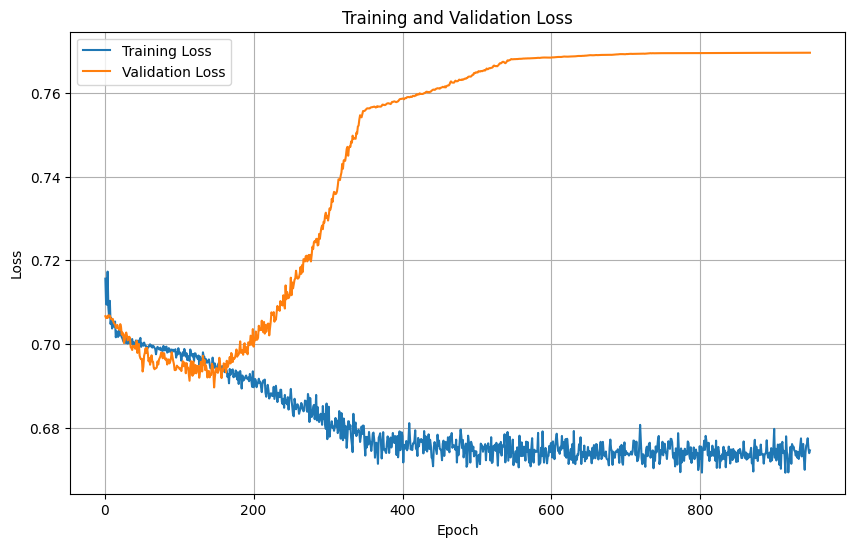

In [411]:
import matplotlib.pyplot as plt

# Escludere il primo valore (indice 0) dei dati di perdita
training_loss = history.history['loss'][3:]
validation_loss = history.history['val_loss'][3:]

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [402]:
def prob_to_binary(predictions_proba, patient_scores, threshold, mode):
        final_predictionarray=[]          
        if(mode=='MV'): ## majority voting
            for p in predictions_proba:
                test_patient_predictions=[]
                for proba in p:               
                    predictions_binary = 1 if proba > threshold else 0
                    test_patient_predictions.append(predictions_binary)
                count_0 = np.sum(np.array(test_patient_predictions)==0) 
                count_1 = np.sum(np.array(test_patient_predictions)==1)                                   
                final_prediction = 0 if count_0 > count_1 else 1
                final_predictionarray.append(final_prediction)
        
        elif (mode=='Mean'): ## mean
            for score in patient_scores:
                predictions_binary = 1 if score > threshold else 0
                final_predictionarray.append(predictions_binary)    
    
        return final_predictionarray



In [361]:
patient_scores = []
temp_array=[]
for x in range(len(patients_test)):
        patient_predictions = []
        patient_predictions1 = []
        
        r=len(features_test[x])
        for i in range(r):
                
                p=classifier.predict(final_patients_test[x])
                patient_predictions.append(p)
                mean=np.mean(p)

        patient_scores.append(mean)
        temp_array.append(p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━

## Prediction

In [362]:
binary_predictions = prob_to_binary(temp_array, patient_scores, 0.5, 'MV')
print(binary_predictions)
binary_predictions = prob_to_binary(temp_array, patient_scores, 0.5, 'Mean')
print(binary_predictions)

[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]


## calcolo metriche

In [363]:
f1 = f1_score(y_test, binary_predictions)
best_precision = precision_score(y_test, binary_predictions)
best_recall = recall_score(y_test, binary_predictions)

y_test= np.array(y_test)
binary_predictions=np.array(binary_predictions)
test_accuracy = accuracy_score(y_test, binary_predictions)

precision1 = precision_score(y_test, binary_predictions)
recall1 = recall_score(y_test, binary_predictions)

precision, recall, _ = precision_recall_curve(y_test, patient_scores)
pr_auc = average_precision_score(y_test, patient_scores)


roc_auc= roc_auc_score(y_test, patient_scores)


conf= confusion_matrix(y_test, binary_predictions)


print(f"F1 score: {f1}")
print(f"PR AUC: {pr_auc}")
print(f"ROC AUC: {roc_auc}")
print(f"Accuracy: {test_accuracy}")
print(f"Confusion Matrix:")
print(conf)
print(f"Best Precision: {precision1}")
print(f"Best Recall: {recall1}")

F1 score: 0.16666666666666666
PR AUC: 0.32817283711730305
ROC AUC: 0.49264705882352944
Accuracy: 0.6
Confusion Matrix:
[[14  3]
 [ 7  1]]
Best Precision: 0.25
Best Recall: 0.125


## Mean

In [ ]:

results_test_Mean=[{} for _ in range(len(classifiers))]
results_val_Mean = [{} for _ in range(len(classifiers))]
starting_features = len(features_train[0][0])
i=0
for classifier in classifiers:
    print("Starting with classifier:", classifier)
    for selector in selectors: 
        print("Doing with selector:", selector)
        results_test_Mean[i][selector] = {
                'classifier': classifier,
                'alpha': [],
                'num_features': [],
                'pr_auc': [],
                'best_precision' :[],
                'best_recall':[],
                'roc_auc':[],
                'f1':[],
                'accuracy':[],
                'confusion_matrix':[],
                'best_threshold':[],
                'selected_features': []
                }
        results_val_Mean[i][selector] = {
                'classifier': classifier,
                'alpha': [],
                'num_features': [],
                'pr_auc': [],
                'best_precision' :[],
                'best_recall':[],
                'roc_auc':[],
                'f1':[],
                'accuracy':[],
                'confusion_matrix':[],
                'best_threshold':[],
                'selected_features': []
                }


        features=perform_correlation(features_train, y_train, starting_features, 0.85)

        final_patients_train=remove_features_from_patients(features_train, features)
        final_patients_test=remove_features_from_patients(features_test, features)
        final_patients_val=remove_features_from_patients(features_val, features)

        x_train_expanded, y_train_expanded, _ = continue_array(final_patients_train, y_train)

        x_train_expanded, sf= select_features_by_p_value(x_train_expanded, y_train_expanded)
        
        final_patients_test=keep_features_in_patients(final_patients_test, sf)
        final_patients_val=keep_features_in_patients(final_patients_val, sf)
        print(len(sf))
        print("len(final_patients_test)", len(final_patients_test[0][0]))
        print("len(final_patients_val)", len(final_patients_val[0][0]))
        print("len(x_train_expanded)", len(x_train_expanded[0]))

        if selector == 'lasso':
                for alpha in alpha_values:
                        print("sto facendo alpha:",alpha)

                        if(classifier=='RandomForest'):
                             classi = RandomForestClassifier(n_estimators=100, random_state=42)
                        if(classifier=='Logistic'):
                             classi = LogisticRegression()
                        if(classifier=='SVM'):
                             classi = SVC(kernel='rbf', probability=True, random_state=42)
                        if(classifier=='XgBoost'):
                             classi = XGBClassifier()
                        if(classifier=='MLP'):
                             classi = MLPClassifier(hidden_layer_sizes=(128,64, 32), max_iter=1000, random_state=42, early_stopping=True, learning_rate='adaptive')
                        if(classifier=='mlp_model'):
                             classi = mlp_model
                        
                        best_f1_score, best_precision, best_recall, conf, test_accuracy, precision, recall, pr_auc, roc_auc, bt, number_features, selected_features, classifier= classification_method1(
                            selector, alpha, classi, x_train_expanded, y_train_expanded, 
                            patients_val, y_val, final_patients_val, 0, 'Mean'
                        )

                        if(best_f1_score==0 and best_precision==0 and best_recall==0):
                            break
                    
                        results_val_Mean[i][selector]['alpha'].append(alpha)
                        results_val_Mean[i][selector]['selected_features'].append(selected_features)
                        results_val_Mean[i][selector]['num_features'].append(number_features)
                        results_val_Mean[i][selector]['pr_auc'].append(pr_auc)
                        results_val_Mean[i][selector]['best_precision'].append(best_precision)
                        results_val_Mean[i][selector]['best_recall'].append(best_recall)
                        results_val_Mean[i][selector]['roc_auc'].append(roc_auc)
                        results_val_Mean[i][selector]['f1'].append(best_f1_score)
                        results_val_Mean[i][selector]['accuracy'].append(test_accuracy)
                        results_val_Mean[i][selector]['confusion_matrix'].append(conf)
                        results_val_Mean[i][selector]['best_threshold'].append(bt)

                        ## classifico il test

                        best_f1_score, best_precision, best_recall, conf, test_accuracy, precision, recall, pr_auc, roc_auc, bt, number_features, selected_features, _= classification_method1(
                                    selector, alpha, classifier, x_train_expanded, y_train_expanded, 
                                    patients_test, y_test, final_patients_test, 0, 'Mean',  bt, "Test", selected_features)
                        
                        
                        results_test_Mean[i][selector]['alpha'].append(alpha)
                        results_test_Mean[i][selector]['num_features'].append(number_features)
                        results_test_Mean[i][selector]['selected_features'].append(selected_features)
                        results_test_Mean[i][selector]['pr_auc'].append(pr_auc)
                        results_test_Mean[i][selector]['best_precision'].append(best_precision)
                        results_test_Mean[i][selector]['best_recall'].append(best_recall)
                        results_test_Mean[i][selector]['roc_auc'].append(roc_auc)
                        results_test_Mean[i][selector]['f1'].append(best_f1_score)
                        results_test_Mean[i][selector]['accuracy'].append(test_accuracy)
                        results_test_Mean[i][selector]['confusion_matrix'].append(conf)
                        results_test_Mean[i][selector]['best_threshold'].append(bt)
                        
                        
                        # Plot dei risultati per 'lasso'

        else:
                    for t in range(2, len(x_train_expanded[0])+1):
                         
                         print("sto facendo features:",t)
                         
                         if(classifier=='RandomForest'):
                             classi = RandomForestClassifier(n_estimators=100, random_state=42)
                         if(classifier=='Logistic'):
                             classi = LogisticRegression()
                         if(classifier=='SVM'):
                             classi = SVC(kernel='rbf', probability=True, random_state=42)
                         if(classifier=='XgBoost'):
                             classi = XGBClassifier()
                         if(classifier=='MLP'):
                             classi = MLPClassifier(hidden_layer_sizes=(128,64, 32), max_iter=1000, random_state=42, early_stopping=True, learning_rate='adaptive')
                         if(classifier=='mlp_model'):
                             classi = mlp_model
                         
                         best_f1_score, best_precision, best_recall, conf, test_accuracy, precision, recall, pr_auc, roc_auc, bt, _, selected_features, classifier= classification_method1(
                            selector, 0, classi, x_train_expanded, y_train_expanded, 
                            patients_val, y_val, final_patients_val, t, 'MV'
                        )
                         results_val_Mean[i][selector]['num_features'].append(t)
                         results_val_Mean[i][selector]['pr_auc'].append(pr_auc)
                         results_val_Mean[i][selector]['selected_features'].append(selected_features)
                         results_val_Mean[i][selector]['best_precision'].append(best_precision)
                         results_val_Mean[i][selector]['best_recall'].append(best_recall)
                         results_val_Mean[i][selector]['roc_auc'].append(roc_auc)
                         results_val_Mean[i][selector]['f1'].append(best_f1_score)
                         results_val_Mean[i][selector]['accuracy'].append(test_accuracy)
                         results_val_Mean[i][selector]['confusion_matrix'].append(conf)
                         results_val_Mean[i][selector]['best_threshold'].append(bt)

                         ## classifico test
                         best_f1_score, best_precision, best_recall, conf, test_accuracy, precision, recall, pr_auc, roc_auc, bt, number_features, selected_features, _= classification_method1(
                                        selector, 0, classifier, x_train_expanded, y_train_expanded, 
                                        patients_test, y_test, final_patients_test, t, 'MV', bt, "Test", selected_features)
                         
                         results_test_Mean[i][selector]['num_features'].append(t)
                         results_test_Mean[i][selector]['selected_features'].append(selected_features)
                         results_test_Mean[i][selector]['pr_auc'].append(pr_auc)
                         results_test_Mean[i][selector]['best_precision'].append(best_precision)
                         results_test_Mean[i][selector]['best_recall'].append(best_recall)
                         results_test_Mean[i][selector]['roc_auc'].append(roc_auc)
                         results_test_Mean[i][selector]['f1'].append(best_f1_score)
                         results_test_Mean[i][selector]['accuracy'].append(test_accuracy)
                         results_test_Mean[i][selector]['confusion_matrix'].append(conf)
                         results_test_Mean[i][selector]['best_threshold'].append(bt)


        #mean_threshold, mean_param  = find_best_threshold_features(results_val[i], selector)
        #print(f"The mean best threshold for {selector} is: {mean_threshold}")
    
        
    i=i+1


 
        #plot_results(results_rf, results_test_rf, selector)

            

Starting with classifier: mlp_model
Doing with selector: p_value
15
len(final_patients_test) 15
len(final_patients_val) 15
len(x_train_expanded) 15
sto facendo features: 2
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/s

In [ ]:
# Dizionario per memorizzare i migliori risultati per ogni classificatore e selettore
best_results_per_classifier_and_selector = {
    classifier: {
        selector: None for selector in selectors
    } for classifier in classifiers
}

# Funzione per confrontare i risultati e determinare se è migliore
def is_better(result, best_result):
    if best_result is None:
        return True
    
    if result['f1'] > best_result['f1']:
        return True
    elif result['f1'] == best_result['f1']:
        if result['pr_auc'] > best_result['pr_auc']:
            return True
        elif result['pr_auc'] == best_result['pr_auc']:
            if result['roc_auc'] > best_result['roc_auc']:
                return True
    return False

# Funzione per trovare i migliori risultati per un dato set di risultati
def find_best_results(results_val, mode):
    for i, classifier in enumerate(classifiers):
        for selector in selectors:
            num_results = len(results_val[i][selector]['f1'])

            for j in range(num_results):
                current_result = {
                    'classifier': classifier,
                    'selector': selector,
                    'f1': results_val[i][selector]['f1'][j],
                    'pr_auc': results_val[i][selector]['pr_auc'][j],
                    'roc_auc': results_val[i][selector]['roc_auc'][j],
                    'accuracy': results_val[i][selector]['accuracy'][j],
                    'num_features': results_val[i][selector]['num_features'][j],
                    'confusion_matrix': results_val[i][selector]['confusion_matrix'][j],
                    'best_precision': results_val[i][selector]['best_precision'][j],
                    'best_recall': results_val[i][selector]['best_recall'][j],
                    'best_threshold': results_val[i][selector]['best_threshold'][j],
                    'selected_features': results_val[i][selector]['selected_features'][j]
                }

                if is_better(current_result, best_results_per_classifier_and_selector[classifier][selector]):
                    best_results_per_classifier_and_selector[classifier][selector] = current_result

# Trova i migliori risultati per entrambi i set di risultati
find_best_results(results_val_Mean, 'mean')
find_best_results(results_val_MV, 'majority voting')

classifier_alphas = {}

# Stampa i migliori risultati per ogni classificatore e selettore
for classifier, selector_results in best_results_per_classifier_and_selector.items():
    for selector, best_result in selector_results.items():
        if best_result is not None:
            print(f"Miglior risultato per il classificatore {classifier} e il selettore {selector}:")
            print(f"F1 score: {best_result['f1']}")
            print(f"PR AUC: {best_result['pr_auc']}")
            print(f"ROC AUC: {best_result['roc_auc']}")
            print(f"Accuracy: {best_result['accuracy']}")
            print(f"Numero di features: {best_result['num_features']}")
            print(f"Confusion Matrix:")
            print(best_result['confusion_matrix'])
            print(f"Best Precision: {best_result['best_precision']}")
            print(f"Best Recall: {best_result['best_recall']}")
            print(f"Best Threshold: {best_result['best_threshold']}")
            print(f"Selected Features: {best_result['selected_features']}")
            
            # Se il selettore è "lasso", recupera e stampa anche il valore di alpha
            if selector == 'lasso':
                # Trova l'indice del miglior risultato in results_val per il classificatore e selettore correnti
                if mode == 'mean':
                    idx = results_val_Mean[classifiers.index(classifier)][selector]['f1'].index(best_result['f1'])
                    alpha_opt = results_val_Mean[classifiers.index(classifier)][selector]['alpha'][idx]
                else:
                    idx = results_val_MV[classifiers.index(classifier)][selector]['f1'].index(best_result['f1'])
                    alpha_opt = results_val_MV[classifiers.index(classifier)][selector]['alpha'][idx]
                print(f"Alpha: {alpha_opt}")
            else:
                alpha_opt = 0

            classifier_alphas[classifier] = alpha_opt
            print("--------------------")

print("--------------------")

# Trova il miglior classificatore globale
best_overall_result = None
best_overall_classifier = None
best_overall_selector = None

for classifier, selector_results in best_results_per_classifier_and_selector.items():
    for selector, best_result in selector_results.items():
        if best_result is not None:
            # Se non abbiamo ancora un miglior risultato globale, lo impostiamo direttamente
            if best_overall_result is None:
                best_overall_result = best_result
                best_overall_classifier = classifier
                best_overall_selector = selector
            else:
                # Confrontiamo i risultati per trovare il miglior classificatore globale
                if (best_result['f1'] > best_overall_result['f1'] or
                    (best_result['f1'] == best_overall_result['f1'] and
                     best_result['pr_auc'] > best_overall_result['pr_auc']) or
                    (best_result['f1'] == best_overall_result['f1'] and
                     best_result['pr_auc'] == best_overall_result['pr_auc'] and
                     best_result['roc_auc'] > best_overall_result['roc_auc'])):
                    
                    best_overall_result = best_result
                    best_overall_classifier = classifier
                    best_overall_selector = selector

# Stampa il miglior risultato globale
if best_overall_result is not None:
    best_threshold_fin = best_overall_result['best_threshold']
    selected_features_fin = best_overall_result['selected_features']
    alpha_fin = classifier_alphas[best_overall_classifier]

    print(f"Miglior classificatore globale: {best_overall_classifier} (selector {best_overall_selector})")
    print(f"Threshold: {best_threshold_fin}")
    print(f"Selected Features: {selected_features_fin}")
    print(f"Alpha: {alpha_fin}")
else:
    print("Nessun miglior risultato globale trovato.")


Miglior risultato per il classificatore mlp_model e il selettore p_value:
F1 score: 0.5945945945945946
PR AUC: 0.358008658008658
ROC AUC: 0.48086124401913877
Accuracy: 0.5
Numero di features: 12
Confusion Matrix:
[[ 4 15]
 [ 0 11]]
Best Precision: 0.4230769230769231
Best Recall: 1.0
Best Threshold: 0.49
Selected Features: [ 0  1  2  3  4  5  6  7  8  9 10 11]
--------------------
Miglior risultato per il classificatore mlp_model e il selettore mrmr:
F1 score: 0.6470588235294118
PR AUC: 0.36666666666666664
ROC AUC: 0.5
Accuracy: 0.6
Numero di features: 8
Confusion Matrix:
[[ 7 12]
 [ 0 11]]
Best Precision: 0.4782608695652174
Best Recall: 1.0
Best Threshold: 0.497
Selected Features: [0, 2, 12, 13, 5, 14, 6, 7]
--------------------
Miglior risultato per il classificatore mlp_model e il selettore rf:
F1 score: 0.6451612903225806
PR AUC: 0.36666666666666664
ROC AUC: 0.5
Accuracy: 0.6333333333333333
Numero di features: 6
Confusion Matrix:
[[ 9 10]
 [ 1 10]]
Best Precision: 0.5
Best Recall: 0

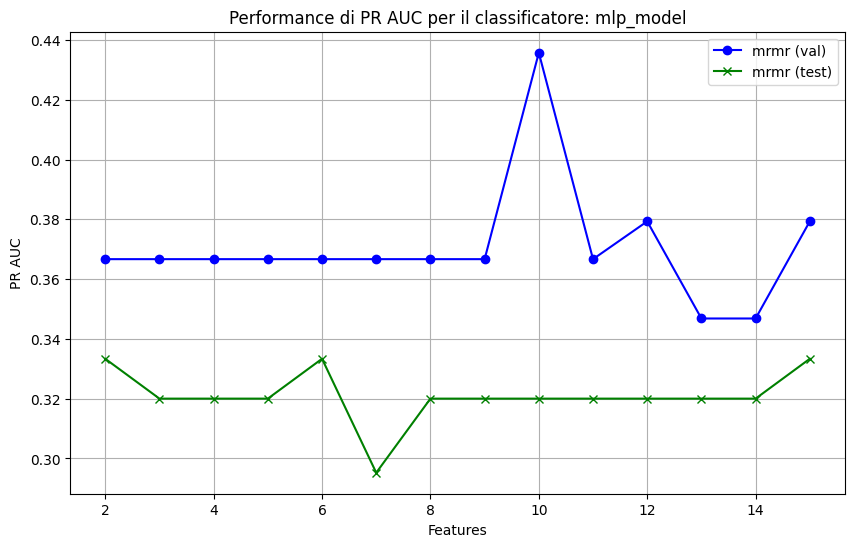

Risultati per 8 funzionalità:
PR AUC: 0.32
ROC AUC: 0.5
F1: 0.5517241379310345
Precision: 0.38095238095238093
Recall: 1.0
Accuracy: 0.48
Confusion Matrix:
[[ 4 13]
 [ 0  8]]



In [ ]:
import matplotlib.pyplot as plt

# Dati da utilizzare per il grafico
classifier = best_overall_classifier
selector = best_overall_selector
mode = best_overall_mode

# Seleziona il set di risultati di test corretto in base alla modalità
if mode == 'mean':
    results_test = results_test_Mean
else:
    results_test = results_test_MV

# Recupera i dati di PR AUC e numero di features per results_val e results_test
num_features_val = results_val_Mean[classifiers.index(classifier)][selector]['num_features'] if mode == 'mean' else results_val_MV[classifiers.index(classifier)][selector]['num_features']
pr_auc_val = results_val_Mean[classifiers.index(classifier)][selector]['pr_auc'] if mode == 'mean' else results_val_MV[classifiers.index(classifier)][selector]['pr_auc']

num_features_test = results_test[classifiers.index(classifier)][selector]['num_features']
pr_auc_test = results_test[classifiers.index(classifier)][selector]['pr_auc']

# Definizione di colori diversi per validazione e test
color_val = 'blue'
color_test = 'green'

plt.figure(figsize=(10, 6))

# Plot per results_val (validazione)
plt.plot(num_features_val, pr_auc_val, marker='o', label=f'{selector} (val)', color=color_val)

# Plot per results_test (test)
plt.plot(num_features_test, pr_auc_test, marker='x', label=f'{selector} (test)', color=color_test)

plt.title(f'Performance di PR AUC per il classificatore: {classifier}')
plt.xlabel('Features')
plt.ylabel('PR AUC')
plt.legend()
plt.grid(True)
plt.show()

specific_num_features = len(selected_features_fin)  # Adatta questo valore al tuo numero specifico di funzionalità

# Cerca l'indice del numero di funzionalità specificato
if specific_num_features in num_features_test:
    index = num_features_test.index(specific_num_features)
    
    # Stampa i risultati per il numero di funzionalità specificato
    print(f"Risultati per {specific_num_features} funzionalità:")
    print(f"PR AUC: {results_test[classifiers.index(classifier)][selector]['pr_auc'][index]}")
    print(f"ROC AUC: {results_test[classifiers.index(classifier)][selector]['roc_auc'][index]}")
    print(f"F1: {results_test[classifiers.index(classifier)][selector]['f1'][index]}")
    print(f"Precision: {results_test[classifiers.index(classifier)][selector]['best_precision'][index]}")
    print(f"Recall: {results_test[classifiers.index(classifier)][selector]['best_recall'][index]}")
    print(f"Accuracy: {results_test[classifiers.index(classifier)][selector]['accuracy'][index]}")
    print(f"Confusion Matrix:\n{results_test[classifiers.index(classifier)][selector]['confusion_matrix'][index]}\n")
else:
    print(f"Numero di funzionalità {specific_num_features} non trovato nei risultati di test.")


In [ ]:
#patients_train, patients_test, y_train, y_test, features_train, features_test= train_test_split(loaded_patients, labels, patients, test_size=0.2, shuffle=False, random_state=1)

if(best_overall_classifier=='RandomForest'):
         classi = RandomForestClassifier(n_estimators=100, random_state=42)
if(best_overall_classifier=='Logistic'):
                             classi = LogisticRegression()
if(best_overall_classifier=='SVM'):
                             classi = SVC(kernel='rbf', probability=True, random_state=42)
if(best_overall_classifier=='XgBoost'):
                             classi = XGBClassifier()
if(best_overall_classifier=='MLP'):
                             classi = MLPClassifier(hidden_layer_sizes=(128,64, 32), max_iter=1000, random_state=42, early_stopping=True, learning_rate='adaptive')

#x_train_expanded, y_train_expanded, _= continue_array(features_train1, y_train1)

sf = stringhe_numeri = [str(f) for f in selected_features_fin]

final_patients_train = keep_features_in_patients(features_train1, sf)

x_train_expanded, y_train_expanded, _ = continue_array(final_patients_train, y_train1)

features_test_fin = keep_features_in_patients(features_test, sf)
print(best_overall_mode)
if(best_overall_mode=='majority voting'):
    best_overall_mode='MV'
if(best_overall_mode=='mean'):
    best_overall_mode='Mean'

    
f1_final, precision_final, recall_final, conf_final, accuracy_final= classification_method2(classi, x_train_expanded, y_train_expanded, patients_test, y_test, features_test_fin, best_threshold_fin, best_overall_mode)

print(f"classifier: {best_overall_classifier}")
print(f"selector: {best_overall_selector}")
print(f"F1 score finale: {f1_final}")
print(f"Precision finale: {precision_final}")
print(f"Recall finale: {recall_final}")
print("Confusion Matrix finale:")
print(conf_final)
print(f"Accuracy finale: {accuracy_final}")
print(f"threshold: {best_threshold_fin}")
print(f"features: {selected_features_fin} e sono {len(selected_features_fin)}")





majority voting


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_1" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 8)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 8), dtype=float32)
  • training=True
  • mask=None